Kütüphaneleri içeri aktarma

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Veri Toplama ve İşleme

In [43]:
# .csv uzantılı veri setimizi Pandas DataFrame'e yükleme
gold_data = pd.read_csv('gld_price_data.csv')

In [44]:
# veri çerçevesindeki ilk 5 satırı yazdır
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [45]:
# Veri çerçevesinin son 5 satırını yazdır
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [46]:
# satır ve sütun sayısını alma
gold_data.shape

(2290, 6)

In [47]:
# veriler hakkında bazı temel bilgileri almak
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [48]:
# eksik değerlerin sayısını kontrol etme
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [49]:
# verilerin istatistiksel ölçülerini almak
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Korelasyon:
1. Pozitif Korelasyon
2. Negatif Korelasyon

In [50]:
correlation = gold_data.corr()

<AxesSubplot:>

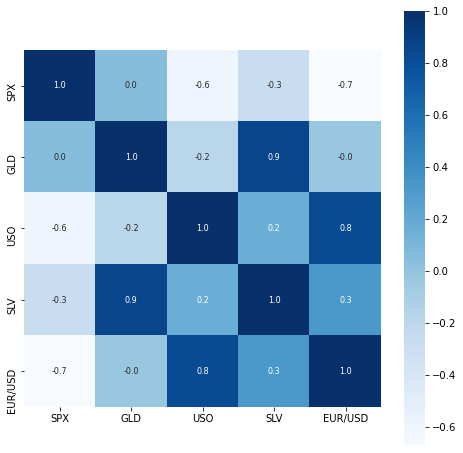

In [51]:
# korelasyonu anlamak için bir ısı haritası oluşturma işlemi yaptık
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [52]:
# GLD'nin korelasyon değerleri
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

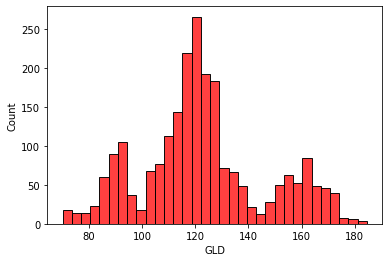

In [60]:
# GLD Fiyatının dağılımının kontrol edilmesi
sns.histplot(gold_data['GLD'],color='red')

Özellikleri ve Hedefi Bölme //0=satır(index) 1=sütun bırakılıp bırakılmayacağı seçilir. Date ve GLD kaldırıldı.

In [66]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [59]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Verilerimizi Eğitim Verileri ve Test Verilerine Bölme İşlemi

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Eğitimi: 
Random Forest Regressor(Rastgele Orman Regrasyonu)

In [22]:
regressor = x

In [23]:
# modeli eğitme işlemi
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Değerlendirmesi

In [24]:
# Test Verileri üzerinde tahmin işlemi
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.55479938  81.60640008 115.93420028 127.56100084 120.85660138
 154.78499796 150.46459817 126.07169974 117.57709863 125.96780113
 116.91340101 171.27060089 141.5422985  168.17269866 115.14790023
 118.01200055 138.30410309 170.04570075 158.59180278 160.23929896
 155.01360057 125.04600026 176.31519923 157.39030367 125.20950045
  93.63489933  77.58620059 120.51399986 119.1734995  167.51099948
  88.16500085 125.27650008  91.18450056 117.62640019 121.27909878
 136.83790028 115.50150111 115.19100091 147.91349996 106.98830125
 104.64580258  87.22219822 126.51310053 117.76470036 151.82479936
 119.70569988 108.34529974 108.17089841  93.24280024 127.30589725
  74.96970055 113.66449915 121.02830026 111.2663992  118.97559889
 120.50089936 159.63650016 169.18100096 146.94079694  85.71889822
  94.4256006   86.7309987   90.6081004  119.08620074 126.50960072
 127.39189958 169.78649901 122.20229926 117.32689927  98.62570004
 168.32280169 142.94469825 132.21600227 121.02980198 121.34489912
 119.78090

In [26]:
# R kare hata oranı
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R kare hata oranı : ", error_score)

R kare hata oranı :  0.989302490696513


Bir Grafikte Gerçek Değerleri ve Tahmini Değerleri Karşılaştırma

In [27]:
Y_test = list(Y_test)

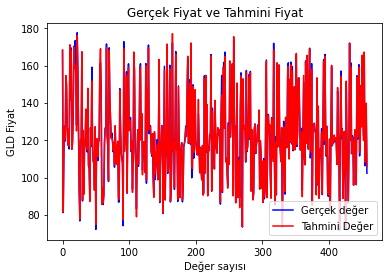

In [28]:
plt.plot(Y_test, color='blue', label = 'Gerçek değer')
plt.plot(test_data_prediction, color='red', label='Tahmini Değer')
plt.title('Gerçek Fiyat ve Tahmini Fiyat')
plt.xlabel('Değer sayısı')
plt.ylabel('GLD Fiyat')
plt.legend()
plt.show()